Assignment

    Learn about the mathematics of Logistic Regression by watching Aaron Gallant's video #1 (12 minutes) & video #2 (9 minutes).
    Start a clean notebook.
    Do train/validate/test split with the Tanzania Waterpumps data.
    Begin to explore and clean the data. For ideas, refer to The Quartz guide to bad data, a "reference to problems seen in real-world data along with suggestions on how to resolve them." One of the issues is "Zeros replace missing values."
    Select different numeric and categorical features.
    Do one-hot encoding. (Remember it may not work with high cardinality categoricals.)
    Scale features.
    Use scikit-learn for logistic regression.
    Get your validation accuracy score.
    Get and plot your coefficients.
    Submit your predictions to our Kaggle competition.
    Commit your notebook to your fork of the GitHub repo

In [1]:
import pandas as pd
train_features = pd.read_csv('https://drive.google.com/uc?export=download&id=14ULvX0uOgftTB2s97uS8lIx1nHGQIB0P')
train_labels = pd.read_csv('https://drive.google.com/uc?export=download&id=1r441wLr7gKGHGLyPpKauvCuUOU556S2f')
test_features = pd.read_csv('https://drive.google.com/uc?export=download&id=1wvsYl9hbRbZuIuoaLWCsW_kbcxCdocHz')
sample_submission = pd.read_csv('https://drive.google.com/uc?export=download&id=1kfJewnmhowpUo381oSn3XqsQ6Eto23XV')
train_features.shape, train_labels.shape, test_features.shape, sample_submission.shape

((59400, 40), (59400, 2), (14358, 40), (14358, 2))

DO TRAIN/VALIDATE/TEST SPLIT 

In [2]:
from sklearn.model_selection import train_test_split

X_train = train_features
y_train = train_labels['status_group']

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, train_size=.8, test_size=.2,
    stratify=y_train, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 40), (11880, 40), (47520,), (11880,))

In [3]:
X_train_num=X_train.select_dtypes('number')
X_val_num = X_val.select_dtypes('number')

Do One-Hot Encoding

In [5]:
import category_encoders as ce
X_train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,47520,1,GeoData Consultants Ltd,47520
public_meeting,44876,2,True,40838
permit,45077,2,True,31071
source_class,47520,3,groundwater,36638
management_group,47520,5,user-group,42027
quantity_group,47520,5,enough,26567
quantity,47520,5,enough,26567
waterpoint_type_group,47520,6,communal standpipe,27642
quality_group,47520,6,good,40598
payment_type,47520,7,never pay,20287


In [26]:
X_train['waterpoint_type'].value_counts(dropna=False)

communal standpipe             22778
hand pump                      14015
other                           5138
communal standpipe multiple     4864
improved spring                  631
cattle trough                     89
dam                                5
Name: waterpoint_type, dtype: int64

In [27]:
train = X_train.copy()
train['status_group'] = y_train

#Do groupby
train.groupby('waterpoint_type')['status_group'].value_counts(normalize=True)

waterpoint_type              status_group           
cattle trough                functional                 0.741573
                             non functional             0.247191
                             functional needs repair    0.011236
communal standpipe           functional                 0.622706
                             non functional             0.298270
                             functional needs repair    0.079024
communal standpipe multiple  non functional             0.523232
                             functional                 0.366571
                             functional needs repair    0.110197
dam                          functional                 1.000000
hand pump                    functional                 0.617125
                             non functional             0.324367
                             functional needs repair    0.058509
improved spring              functional                 0.727417
                             non func

In [28]:
X_train['waterpoint_type'].head(10)

43360             communal standpipe
7263              communal standpipe
2486                       hand pump
313                            other
52726             communal standpipe
8558              communal standpipe
2559     communal standpipe multiple
54735             communal standpipe
25763                      hand pump
44540                          other
Name: waterpoint_type, dtype: object

In [29]:
encoder = ce.OneHotEncoder(use_cat_names=True)
encoded = encoder.fit_transform(X_train['waterpoint_type'])
encoded.head(10)

,waterpoint_type_communal standpipe,waterpoint_type_hand pump,waterpoint_type_other,waterpoint_type_communal standpipe multiple,waterpoint_type_improved spring,waterpoint_type_cattle trough,waterpoint_type_dam
43360,1,0,0,0,0,0,0
7263,1,0,0,0,0,0,0
2486,0,1,0,0,0,0,0
313,0,0,1,0,0,0,0
52726,1,0,0,0,0,0,0
8558,1,0,0,0,0,0,0
2559,0,0,0,1,0,0,0
54735,1,0,0,0,0,0,0
25763,0,1,0,0,0,0,0
44540,0,0,1,0,0,0,0


In [30]:
from sklearn.preprocessing import StandardScaler
categorical_features =['waterpoint_type']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features=categorical_features + numeric_features

X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder= ce.OneHotEncoder(use_cat_names=True)
X_train_encoded=encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

C:\Users\Kevona Jean\myCODE\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kevona Jean\myCODE\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Kevona Jean\myCODE\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


Validation Accuracy 0.6303030303030303


In [11]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)

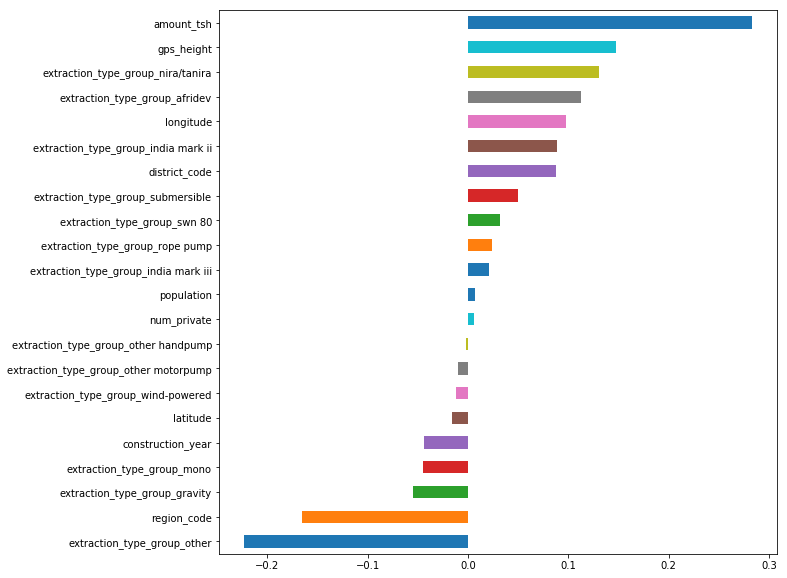

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
coefficients.sort_values().plot.barh();

In [13]:
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)

C:\Users\Kevona Jean\myCODE\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
all(X_test_encoded.columns == X_train_encoded.columns)

True

In [15]:
y_pred = model.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-01.csv', index=False)